X Shape:  (200, 2)
Centroids:  [[ 17.63415606  93.5948021 ]
 [ 54.93981236   2.62454411]
 [124.85937201   6.01187321]
 [ 41.97227442   4.11922966]
 [ 87.69344468  82.69800597]]
Distances:  [[ 54.65831313  54.02186967 114.70526635  44.09276275  84.81658225]
 [ 12.86731588  87.96533804 133.01240836  81.47488224  72.71327337]
 [ 87.61004406  39.08583745 108.85937266  26.04028294 104.98825711]
 [ 16.67506889  83.95247123 129.96029016  77.37031552  71.91951948]
 [ 53.59855377  53.25743202 113.0877398   43.71549119  82.5874254 ]
 [ 17.60622659  82.60379464 128.57675537  76.09506971  71.01004439]
 [ 87.59556608  37.09371159 106.85937267  24.04594015 103.63281503]
 [  0.54591861  98.55974673 138.42267098  93.02270055  70.60390429]
 [ 90.60509752  35.94177346 105.90220972  22.99952319 105.21673583]
 [ 21.63795294  78.13209323 124.74229243  71.66257303  69.52148354]
 [ 79.60652015  37.69709683 106.1603354   25.00709928  97.15042649]
 [  5.57509588 102.85863411 140.90066844  97.62215923  70.60130

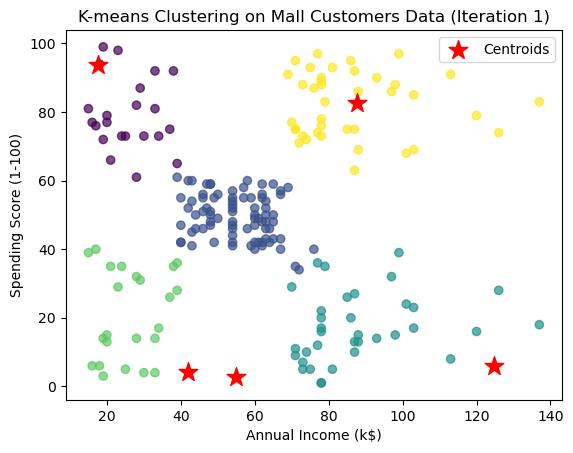

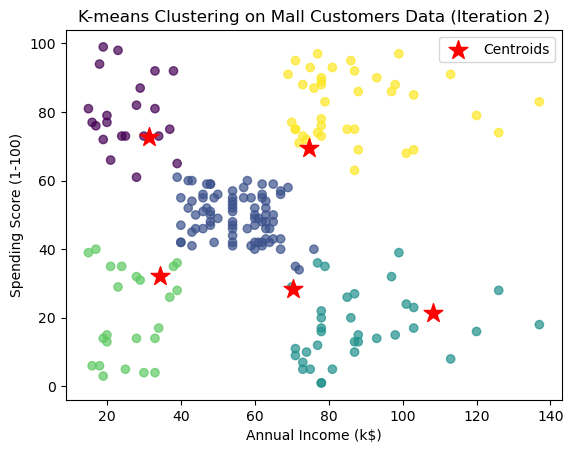

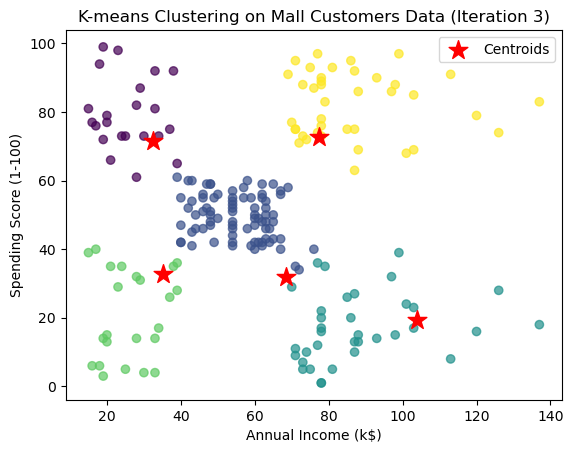

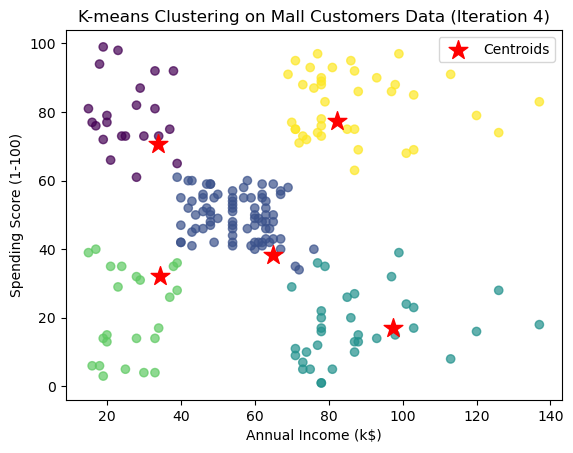

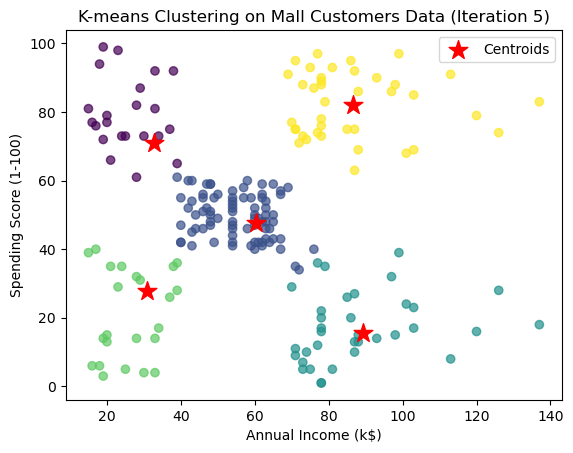

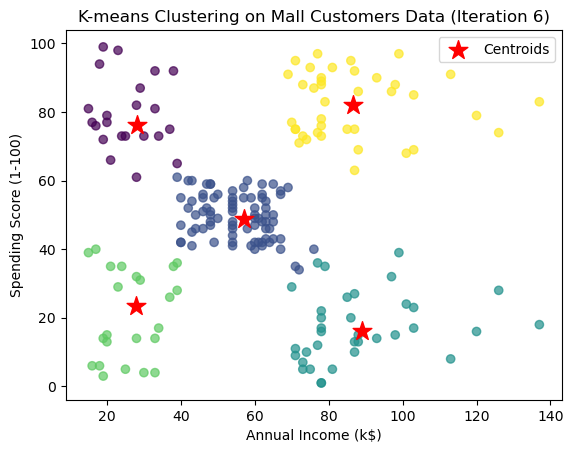

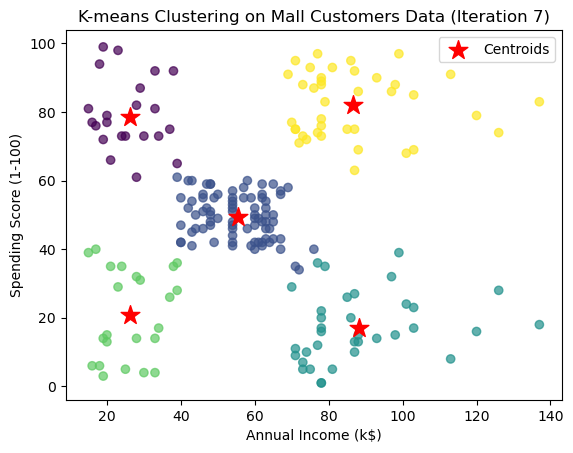

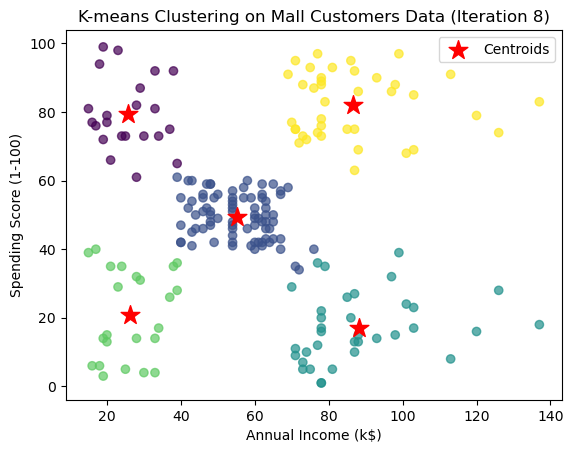

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def kmeans(X, k, max_iterations=200):
    centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(k, X.shape[1]))
    print("Centroids: ",centroids)
    iteration_centroids = [centroids.copy()]  # Storing intermediate centroids

    for _ in range(max_iterations):
        distances = np.sqrt(np.sum((X[:, np.newaxis] - centroids) ** 2, axis=2))
        print("Distances: ", distances)
        labels = np.argmin(distances, axis=1)
        print("Labels: ", labels)

        cluster_centers = [X[labels == i].mean(axis=0) if np.sum(labels == i) > 0 else centroids[i] for i in range(k)]
        if np.max(centroids - cluster_centers) < 0.0001:
            break
        else:
            centroids = np.array(cluster_centers)
            iteration_centroids.append(centroids.copy())  # Storing intermediate centroids
        print("iteration centroids: ", iteration_centroids)

    return iteration_centroids, labels


data = pd.read_csv("Mall_Customers.csv")

# Extracting the features (Annual Income and Spending Score) from the dataset
X = data.iloc[:, [3, 4]].values
print("X Shape: ",X.shape)

K = 5

iteration_centroids, labels = kmeans(X, K)

# Plotting the intermediate stages
for i, centroids in enumerate(iteration_centroids):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, color='red', label='Centroids')
    plt.legend()
    plt.title(f'K-means Clustering on Mall Customers Data (Iteration {i + 1})')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.show()

